# __TODO__:
- adapt code to x,y: df[["x", "y"]] = df["location"].apply(pd.Series), df[["x_end", "y_end"]] = df["pass_end_location"].apply(pd.Series)

## __Load Data__

In [4]:
import pandas as pd
import numpy as np
from statsbombpy import sb
from ast import literal_eval
from dataloader import load_data
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, Standardizer
import math


columns = ['player','location','under_pressure','pass_aerial_won','pass_angle','pass_assisted_shot_id','pass_body_part',
 'pass_cross','pass_cut_back','pass_deflected','pass_end_location','pass_goal_assist','pass_shot_assist','pass_height',
 'pass_inswinging','pass_length','pass_outcome','pass_outswinging','pass_recipient','pass_recipient_id',
 'pass_switch','pass_technique','pass_through_ball','pass_type','shot_key_pass_id']

dtypes = {
    'ball_receipt_outcome': 'category',  # Small set of categorical values
    'ball_recovery_recovery_failure': 'boolean',  # True/False values + NaN
    'block_deflection': 'boolean',  # True/False values + NaN
    'carry_end_location': 'object',  # Lists or complex objects
    'clearance_aerial_won': 'boolean',  # True/False values + NaN
    'clearance_body_part': 'category',  # Categorical values
    'clearance_head': 'boolean',  # True/False values + NaN
    'clearance_left_foot': 'boolean',  # True/False values + NaN
    'clearance_right_foot': 'boolean',  # True/False values + NaN
    'counterpress': 'boolean',  # True/False values + NaN
    'dribble_nutmeg': 'boolean',  # True/False values + NaN
    'dribble_outcome': 'category',  # Categorical values
    'dribble_overrun': 'boolean',  # True/False values + NaN
    'duel_outcome': 'category',  # Categorical values
    'duel_type': 'category',  # Categorical values
    'duration': 'float32',  # Continuous numerical values
    'foul_committed_advantage': 'boolean',  # True/False values + NaN
    'foul_committed_card': 'category',  # Categorical values
    'foul_won_advantage': 'boolean',  # True/False values + NaN
    'foul_won_defensive': 'boolean',  # True/False values + NaN
    'goalkeeper_body_part': 'category',  # Categorical values
    'goalkeeper_end_location': 'object',  # Lists or complex objects
    'goalkeeper_outcome': 'category',  # Categorical values
    'goalkeeper_position': 'category',  # Categorical values
    'goalkeeper_technique': 'category',  # Categorical values
    'goalkeeper_type': 'category',  # Categorical values
    'id': 'string',  # UUIDs, best handled as strings
    'index': 'int32',  # Integers
    'interception_outcome': 'category',  # Categorical values
    'location': 'object',  # Lists or complex objects
    'match_id': 'int32',  # Integers
    'minute': 'int8',  # Small integer range
    'off_camera': 'boolean',  # True/False values + NaN
    'out': 'boolean',  # True/False values + NaN
    'pass_aerial_won': 'boolean',  # True/False values + NaN
    'pass_angle': 'float32',  # Continuous numerical values
    'pass_assisted_shot_id': 'string',  # UUIDs, best handled as strings
    'pass_body_part': 'category',  # Categorical values
    'pass_cross': 'boolean',  # True/False values + NaN
    'pass_cut_back': 'boolean',  # True/False values + NaN
    'pass_deflected': 'boolean',  # True/False values + NaN
    'pass_end_location': 'object',  # Lists or complex objects
    'pass_goal_assist': 'boolean',  # True/False values + NaN
    'pass_height': 'category',  # Categorical values
    'pass_inswinging': 'boolean',  # True/False values + NaN
    'pass_length': 'float32',  # Continuous numerical values
    'pass_outcome': 'category',  # Categorical values
    'pass_outswinging': 'boolean',  # True/False values + NaN
    'pass_shot_assist': 'boolean',  # True/False values + NaN
    'pass_switch': 'boolean',  # True/False values + NaN
    'pass_technique': 'category',  # Categorical values
    'pass_through_ball': 'boolean',  # True/False values + NaN
    'pass_type': 'category',  # Categorical values
    'period': 'int8',  # Only 1 or 2
    'play_pattern': 'category',  # Categorical values
    'position': 'category',  # Categorical values
    'possession': 'int16',  # Medium-sized integer range
    'second': 'int8',  # Small integer range
    'shot_aerial_won': 'boolean',  # True/False values + NaN
    'shot_body_part': 'category',  # Categorical values
    "under_pressure" : "boolean",
    "player" : "string"
}

def load_event_data(match=False):
    if match:
        COMPETITION_ID = 9
        SEASON_ID = 27
        MATCH_ID = 3890561 
        events = sb.events(match_id=MATCH_ID)
        df = events.loc[events["type"] == "Pass", columns] # [row, column] selector
        print(df.shape, df.columns)
        return df
    else:
        df = load_data(frac=(1))
        df = df.loc[df["type"] == "Pass", columns] 
        print(df.shape, df.columns)
        return df

MATCH=False
df = load_event_data(match=MATCH)

[2025-03-17 17:19:29] File exists
[2025-03-17 17:19:29] Loading data form local file system


/Users/alexanderlorenz/Documents/GitHub/ai-fc/src/dataloader.py:77: DtypeWarning: Columns (3,11,13,17,19,40,41,43,66,72,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path).sample(frac=frac, random_state=42)


[2025-03-17 17:20:09] File loaded with shape: (1069866, 116)
(295599, 25) Index(['player', 'location', 'under_pressure', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_shot_assist', 'pass_height',
       'pass_inswinging', 'pass_length', 'pass_outcome', 'pass_outswinging',
       'pass_recipient', 'pass_recipient_id', 'pass_switch', 'pass_technique',
       'pass_through_ball', 'pass_type', 'shot_key_pass_id'],
      dtype='object')


## __Generate Features__

In [7]:
PI = math.pi

def convert_to_list(input_data):
    try:
        return literal_eval(input_data)
    except (ValueError, SyntaxError):
        print(f"Error: The string {input_data} could not be converted to a list.")
        return None
    
def is_in_attacking_third(location):
    pitch_width = 120

    if isinstance(location, str):
        location = convert_to_list(location)

    x = location[0]

    attacking_third_start = 2 * (pitch_width / 3)
    return (attacking_third_start <= x <= pitch_width)  # Stop before penalty area

def is_in_middle_third(location):
    pitch_width = 120

    if isinstance(location, str):
        location = convert_to_list(location)

    x = location[0]

    left_boundary = 1 * (pitch_width/3)
    right_boundary = 2 * (pitch_width/3)
    return (left_boundary <= x < right_boundary)

def is_in_defending_third(location):
    pitch_width = 120
    if isinstance(location, str):
            location = convert_to_list(location)
    x = location[0]

    left_boundary = 1 * (pitch_width/3)
    return (x < left_boundary)

def is_in_penalty_area(location):
    #print("Executing is_in_penalty_area method")
    pitch_width = 120

    if isinstance(location, str):
        location = convert_to_list(location)

    x = location[0]
    y = location[1]

    # Check if in larger penalty area but NOT in goal area
    x_axis = ((102 <= x) and (x <= pitch_width))  # Stop before goal area
    y_axis = ((40 - 22) <= y and y <= (40 + 22))
    return x_axis and y_axis

def is_in_goal_area(location):
    pitch_width = 120

    if isinstance(location, str):
        location = convert_to_list(location)

    x = location[0]
    y = location[1]

    x_axis = ((pitch_width - 6 <= x) and (x <= pitch_width))
    y_axis = ((40 - 10) <= y and y <= (40 + 10))
    return x_axis and y_axis

def is_in_edge_of_the_box(location):
    pitch_width = 120

    if isinstance(location, str):
        location = convert_to_list(location)
        
    x = location[0]
    y = location[1]

    x_axis = ((102 <= x) and (x <= pitch_width))
    y_axis = ((40 - 10) <= y and y <= (40 + 10))
    return x_axis and y_axis

def completed_passes(df):
    return (df["pass_outcome"] != "Incomplete") & \
           (df["pass_outcome"] != "Injury Clearance") & \
           (df["pass_outcome"] != "Out") & \
           (df["pass_outcome"] != "Pass Offside") & \
           (df["pass_outcome"] != "Unknown") 

def is_cut_back_into_edge_of_the_box(df):
    return ((df["pass_cut_back"] == True) & (df["pass_end_location"].apply(is_in_edge_of_the_box)))

def is_chip_ball(df):
    return ((df["pass_height"] == "High Pass"))

def is_vertical_pass(angle, max_tolerance=50):
    """
    Checks if the ball's movement is considered to be deep or vertical moving moving along side the x-axis.
    
    Parameters:
    - angle (float): The angle in radians (from arctan of y/x).
    - max_tolerance (float): Maximum angle in degrees .

    Returns:
    - bool: True if the angle is within the specified range, False otherwise.
    """
    normalized_angle = (angle * (180/PI))
    return  max_tolerance >= abs(normalized_angle)


def is_horizontal_pass(angle, min_tolerance=75, max_tolerance=105):
    """
    Checks if the ball's movement is primarily horizontal based on the angle between the pass direction and the x-axis.
    
    Parameters:
    - angle (float): The angle in radians (from arctan of y/x).
    - min_tolerance (float): Minimum angle in degrees (default is 75°).
    - max_tolerance (float): Maximum angle in degrees (default is 105°).

    Returns:
    - bool: True if the angle is within the specified range, False otherwise.
    """
    normalized_angle = (angle * (180/PI))
    return  max_tolerance >= abs(normalized_angle) >= min_tolerance

def is_progressive_pass(angle, tolerance=75):
    """
    Checks if the ball's movement angle (in radians) is a progressive pass and within the allowed range of angle towards the goal.
    
    Parameters:
    - angle (float): The angle in radians (from arctan of y/x).
    - tolerance (float): Maximum angle in degrees (default is 70°).
    
    Returns:
    - bool: True if the angle is within the tolerance, False otherwise.
    """
    normalized_angle = angle * (180 / PI)
    return abs(normalized_angle) < tolerance

def is_backward_pass(angle, tolerance=105):
    """
    Checks if the ball's movement angle (in radians) is a defensive pass and within the allowed range of angle towards the own goal.
    
    Parameters:
    - angle (float): The angle in radians (from arctan of y/x).
    - tolerance (float): Maximum angle in degrees (default is 70°).
    
    Returns:
    - bool: True if the angle is within the tolerance, False otherwise.
    """
    normalized_angle = angle * (180 / PI)
    return abs(normalized_angle) > tolerance


def is_ex_inside_goal_area(location):
    #print("Executing is_in_goal_area method")
    pitch_width = 120
    if isinstance(location, str):
            location = convert_to_list(location)

    x = location[0]
    y = location[1]

    x_axis = ((pitch_width - 6 <= x) and (x <= pitch_width))
    y_axis = ((40 - 10) <= y and y <= (40 + 10))
    return x_axis and y_axis


def is_ex_inside_penalty_area(location):
    #print("Executing is_in_penalty_area method")
    pitch_width = 120
    if isinstance(location, str):
        location = convert_to_list(location)
    x = location[0]
    y = location[1]

    if is_ex_inside_goal_area(location):
        return False
    else:
        # Check if in larger penalty area but NOT in goal area
        x_axis = ((102 <= x) and (x <= pitch_width))  # Stop before goal area
        y_axis = ((40 - 22) <= y and y <= (40 + 22))
        return x_axis and y_axis

def is_ex_inside_attacking_third(location):
    #print("Executing is_in_attacking_third method")
    pitch_width = 120
    if isinstance(location, str):
        location = convert_to_list(location)
    x = location[0]
    y = location[1]

    if is_ex_inside_goal_area(location) or is_ex_inside_penalty_area(location):
        return False
    else:
        attacking_third_start = 2 * (pitch_width / 3)
        return (attacking_third_start <= x <= pitch_width) 


def calculate_degree(radiant):
    return (radiant * (180/3.14))

def is_pass_completed(pass_outcome):
    return ( (pass_outcome != "Incomplete") & (pass_outcome != "Injury Clearance") & (pass_outcome != "Out") & (pass_outcome != "Pass Offside") &  (pass_outcome != "Unknown") )


df["under_pressure"] = df["under_pressure"] == True

def player_pressure_grouping(df):
    """
    This function Pre-compute all conditions for Vectorize operations.
    Returns results grouped by player and under_pressure  
    """
    # Pre-compute all conditions
    df_with_flags = df.copy()
    
    # Location-based flags
    df_with_flags['is_attacking_third'] = df['location'].apply(is_in_attacking_third)
    df_with_flags['is_middle_third'] = df['location'].apply(is_in_middle_third)
    df_with_flags['is_defending_third'] = df['location'].apply(is_in_defending_third)
    df_with_flags['is_in_box'] = df['location'].apply(is_in_penalty_area)
    df_with_flags['is_in_edge_box'] = df['location'].apply(is_in_edge_of_the_box)
    
    # End location flags
    df_with_flags['end_attacking_third'] = df['pass_end_location'].apply(is_in_attacking_third)
    df_with_flags['end_in_box'] = df['pass_end_location'].apply(is_in_penalty_area)
    df_with_flags['end_in_goal_area'] = df['pass_end_location'].apply(is_in_goal_area)
    df_with_flags['end_in_edge_box'] = df['pass_end_location'].apply(is_in_edge_of_the_box)
    
    # Pass type flags
    df_with_flags['is_completed'] = df['pass_outcome'].isna()
    df_with_flags['is_vertical'] = df['pass_angle'].apply(is_vertical_pass)
    df_with_flags['is_horizontal'] = df['pass_angle'].apply(is_horizontal_pass)
    df_with_flags['is_backward'] = df['pass_angle'].apply(is_backward_pass)
    df_with_flags['is_progressive'] = df['pass_angle'].apply(is_progressive_pass)
    df_with_flags['is_pass_shot_assist'] = df['pass_shot_assist'] == True
    df_with_flags['is_pass_goal_assist'] = df['pass_goal_assist'] == True
    df_with_flags['is_switch'] = df['pass_switch'] == True
    df_with_flags['is_cross'] = df['pass_cross'] == True
    df_with_flags['is_cut_back'] = df['pass_cut_back'] == True
    df_with_flags['is_through_ball'] = df['pass_technique'] == "Through Ball"

    # Pass length categories
    df_with_flags['is_short'] = (df['pass_length'] >= 5) & (df['pass_length'] <= 15)
    df_with_flags['is_medium'] = (df['pass_length'] >= 15) & (df['pass_length'] <= 30)
    df_with_flags['is_long'] = df['pass_length'] >= 30
    df_with_flags['is_short_and_completed'] = (df_with_flags['is_short']) & (df_with_flags['is_completed'])
    df_with_flags['is_medium_and_completed'] = (df_with_flags['is_medium']) & (df_with_flags['is_completed'])
    df_with_flags['is_long_and_completed'] = (df_with_flags['is_long']) & (df_with_flags['is_completed'])
    df_with_flags['is_progressive_and_completed'] = (df_with_flags['is_progressive']) & (df_with_flags['is_completed'])
    df_with_flags['is_horizontal_and_completed'] = (df_with_flags['is_horizontal']) & (df_with_flags['is_completed'])
    df_with_flags['is_backward_and_completed'] = (df_with_flags['is_backward']) & (df_with_flags['is_completed'])
    df_with_flags['is_long_and_vertical'] = (df_with_flags['is_long']) & (df_with_flags['is_vertical'])
    df_with_flags['is_long_vertical_and_from_defending_third'] = (df_with_flags['is_long']) & (df_with_flags['is_vertical']) 
    df_with_flags['is_long_vertical_and_from_mid_third'] = (df_with_flags['is_long']) & (df_with_flags['is_vertical']) & (df_with_flags['is_middle_third'])
    df_with_flags['is_long_vertical_and_from_mid_third_into_the_box'] = (df_with_flags['is_long']) & (df_with_flags['is_vertical']) & (df_with_flags['is_middle_third']) & (df_with_flags['end_in_box'])
    
    # Combined conditions
    df_with_flags['into_box_not_from_box'] = df_with_flags['end_in_box'] & ~df_with_flags['is_in_box']
    df_with_flags['into_box_not_from_box_completed'] = df_with_flags['into_box_not_from_box'] & df_with_flags['is_completed']
    df_with_flags['into_edge_box_not_from_edge_box'] = df_with_flags['end_in_edge_box'] & ~df_with_flags['is_in_edge_box']
    df_with_flags['into_edge_box_not_from_edge_box_completed'] = df_with_flags['into_edge_box_not_from_edge_box'] & df_with_flags['is_completed']
    df_with_flags['is_through_ball_and_completed'] = (df_with_flags['is_through_ball']) & (df_with_flags['is_completed'])
    
    df_with_flags['within_attacking_third'] = df_with_flags['is_attacking_third'] & df_with_flags['end_attacking_third']
    df_with_flags['within_attacking_third_completed'] = df_with_flags['within_attacking_third'] & df_with_flags['is_completed']
    
    # Pass type combinations
    df_with_flags['vertical_into_edge'] = (df_with_flags['is_vertical'] & 
                                          df_with_flags['end_in_edge_box'] & 
                                          (df['pass_type'] != "Corner") &
                                          ~df_with_flags['is_in_edge_box'])
    
    df_with_flags['vertical_into_box'] = (df_with_flags['is_vertical'] & 
                                         df_with_flags['end_in_box'] & 
                                         (df['pass_type'] != "Corner") &
                                         ~df_with_flags['is_in_box'])
    
    df_with_flags['horizontal_into_box'] = (df_with_flags['is_horizontal'] & 
                                           df_with_flags['end_in_box'] & 
                                           (df['pass_type'] != "Corner") &
                                           ~df_with_flags['is_in_box'])
    
    df_with_flags['horizontal_into_edge'] = (df_with_flags['is_horizontal'] & 
                                            df_with_flags['end_in_edge_box'] & 
                                            (df['pass_type'] != "Corner") &
                                            ~df_with_flags['is_in_edge_box'])
    
    # More specialized combinations
    df_with_flags['cut_back_into_edge'] = (df_with_flags['pass_cut_back'] == True) & (df_with_flags["end_in_edge_box"])
    
    df_with_flags['high_vertical_into_edge'] = ((df['pass_height'] == "High Pass") & df_with_flags['vertical_into_edge'])
    df_with_flags['high_vertical_into_box'] = ((df['pass_height'] == "High Pass") & df_with_flags['vertical_into_box'])
    df_with_flags['low_vertical_into_edge'] = ((df['pass_height'] == "Ground Pass") & df_with_flags['vertical_into_edge'])
    df_with_flags['low_vertical_into_box'] = ((df['pass_height'] == "Ground Pass") & df_with_flags['vertical_into_box'])

    df_with_flags['high_horizontal_into_edge'] = ((df['pass_height'] == "High Pass") & df_with_flags['horizontal_into_edge'])
    df_with_flags['high_horizontal_into_box'] = ((df['pass_height'] == "High Pass") & df_with_flags['horizontal_into_box'])
    df_with_flags['low_horizontal_into_edge'] = ((df['pass_height'] == "Ground Pass") & df_with_flags['horizontal_into_edge'])
    df_with_flags['low_horizontal_into_box'] = ((df['pass_height'] == "Ground Pass") & df_with_flags['horizontal_into_box'])
    
    
    result = df_with_flags.groupby(['player', 'under_pressure']).agg(
        passes_total=('player', 'count'),
        passes_completed=('is_completed', 'sum'),
        passes_from_attacking_third=('is_attacking_third', 'sum'),
        passes_from_middle_third=('is_middle_third', 'sum'),
        passes_from_defending_third=('is_defending_third', 'sum'),
        passes_from_the_box=('is_in_box', 'sum'),
        passes_into_attacking_third=('end_attacking_third', 'sum'),
        passes_into_box=('into_box_not_from_box', 'sum'),
        passes_into_box_completed=('into_box_not_from_box_completed', 'sum'),
        passes_into_goal_area=("end_in_goal_area", "sum"),
        passes_into_edge_of_the_box=("into_edge_box_not_from_edge_box", "sum"),
        passes_into_edge_of_the_box_completed=("into_edge_box_not_from_edge_box", "sum"),
        passes_cuts_last_line_of_defence=("is_through_ball", "sum"),
        passes_cuts_last_line_of_defence_completed=("is_through_ball_and_completed", "sum"),
        passes_within_attacking_third=("within_attacking_third", "sum"),
        passes_within_attacking_third_completed=("within_attacking_third_completed", "sum"),
        passes_total_distance=("pass_length", "sum"),
        passes_short_total=("is_short", "sum"),
        passes_short_completed=("is_short_and_completed", "sum"),
        passes_medium_total=("is_medium", "sum"),
        passes_medium_completed=("is_medium_and_completed", "sum"),
        passes_long_total=("is_long", "sum"),
        passes_long_completed=("is_long_and_completed", "sum"),
        passes_shot_assist=("is_pass_shot_assist", "sum"),
        passes_goal_assist=("is_pass_goal_assist", "sum"),
        passes_switch=("is_switch", "sum"),
        passes_cross=("is_cross", "sum"),
        passes_cut_back=("is_cut_back", "sum"),
        passes_vertical_into_edge_of_the_box=("vertical_into_edge", "sum"),
        passes_vertical_into_the_box=("vertical_into_box", "sum"),
        passes_horizontal_into_edge_of_the_box=("horizontal_into_edge", "sum"),
        passes_horizontal_into_the_box=("horizontal_into_box", "sum"),
        passes_cut_back_into_edge_of_the_box=("cut_back_into_edge", "sum"),
        passes_high_vertical_into_edge_of_the_box=("high_vertical_into_edge", "sum"),
        passes_high_vertical_into_the_box=("high_vertical_into_box", "sum"),
        passes_low_vertical_into_edge_of_the_box=("low_vertical_into_edge", "sum"),
        passes_low_vertical_into_the_box=("low_vertical_into_box", "sum"),
        passes_high_horizontal_into_edge_of_the_box=("high_horizontal_into_edge", "sum"),
        passes_high_horizontal_into_the_box=("high_horizontal_into_box", "sum"),
        passes_low_horizontal_into_edge_of_the_box=("low_horizontal_into_edge", "sum"),
        passes_low_horizontal_into_the_box=("low_horizontal_into_box", "sum"),
        passes_progressive=("is_progressive", "sum"),
        passes_progressive_completed=("is_progressive_and_completed", "sum"),
        passes_horizontal=("is_horizontal_and_completed", "sum"),
        passes_horizontal_completed=("is_horizontal_and_completed", "sum"),
        passes_backward=("is_backward", "sum"),
        passes_backward_completed=("is_backward_and_completed", "sum"),
        passes_long_vertical=("is_long_and_vertical", "sum"),
        passes_long_vertical_from_defending_third=("is_long_vertical_and_from_defending_third", "sum"),
        passes_long_vertical_from_mid_third=("is_long_vertical_and_from_mid_third", "sum"),
        passes_long_vertical_from_mid_third_into_the_box=("is_long_vertical_and_from_mid_third_into_the_box", "sum"),
    )
    
    return result

player_under_pressure_grouping = player_pressure_grouping(df)

player_under_pressure_grouping["key_passes"] = player_under_pressure_grouping['passes_shot_assist'] + player_under_pressure_grouping['passes_goal_assist']
player_under_pressure_grouping


passes_total  passes_completed  \
player                       under_pressure                                   
Aaron Hunt                   False                    676               493   
                             True                     194               132   
Adam Hloušek                 False                    187               147   
                             True                      19                10   
Adelino André Vieira Freitas False                   1080               821   
...                                                   ...               ...   
İlkay Gündoğan               True                     287               242   
Łukasz Piszczek              False                   1128               952   
                             True                     153               103   
Łukasz Załuska               False                     31                18   
                             True                       1                 1   

                                             passes_from_attacking_third  \
player                       under_pressure                                
Aaron Hunt                   False                                   261   
                             True                                     77   
Adam Hloušek                 False                                     7   
                             True                                      2   
Adelino André Vieira Freitas False                                   363   
...                                                                  ...   
İlkay Gündoğan               True                                     69   
Łukasz Piszczek              False                                   271   
                             True                                     34   
Łukasz Załuska               False                                     0   
                             True                                      0   

                                             passes_from_middle_third  \
player                       under_pressure                             
Aaron Hunt                   False                                362   
                             True                                  93   
Adam Hloušek                 False                                 89   
                             True                                   8   
Adelino André Vieira Freitas False                                559   
...                                                               ...   
İlkay Gündoğan               True                                 198   
Łukasz Piszczek              False                                647   
                             True                                  85   
Łukasz Załuska               False                                  0   
                             True                                   0   

                                             passes_from_defending_third  \
player                       under_pressure                                
Aaron Hunt                   False                                    53   
                             True                                     24   
Adam Hloušek                 False                                    91   
                             True                                      9   
Adelino André Vieira Freitas False                                   158   
...                                                                  ...   
İlkay Gündoğan               True                                     20   
Łukasz Piszczek              False                                   210   
                             True                                     34   
Łukasz Załuska               False                                    31   
                             True                                      1   

                                             passes_from_the_box  \
player               

In [8]:
total_stats = player_under_pressure_grouping.groupby('player').sum()
player_under_pressure_grouping = player_under_pressure_grouping.add_prefix('up_')
player_under_pressure_grouping = player_under_pressure_grouping.reset_index()
player_under_pressure_grouping = player_under_pressure_grouping[player_under_pressure_grouping["under_pressure"] == True]
player_under_pressure_grouping = player_under_pressure_grouping.drop("under_pressure", axis=1)

player_stats = pd.merge(left=total_stats, right=player_under_pressure_grouping, on="player")
display(player_stats), print(player_stats.columns)

,player,passes_total,passes_completed,passes_from_attacking_third,passes_from_middle_third,passes_from_defending_third,passes_from_the_box,passes_into_attacking_third,passes_into_box,passes_into_box_completed,...,up_passes_progressive_completed,up_passes_horizontal,up_passes_horizontal_completed,up_passes_backward,up_passes_backward_completed,up_passes_long_vertical,up_passes_long_vertical_from_defending_third,up_passes_long_vertical_from_mid_third,up_passes_long_vertical_from_mid_third_into_the_box,up_key_passes
0,Aaron Hunt,870,625,338,455,77,19,382,109,44,...,38,31,31,70,63,7,7,6,2,6
1,Adam Hloušek,206,157,9,97,100,1,48,1,0,...,10,0,0,0,0,8,8,2,0,0
2,Adelino André Vieira Freitas,1304,977,426,683,195,21,563,143,48,...,61,29,29,76,66,10,10,5,0,2
3,Admir Mehmedi,564,424,282,237,45,27,302,54,28,...,33,17,17,69,52,3,3,1,0,2
4,Adnan Januzaj,57,42,43,13,1,3,44,16,8,...,7,4,4,9,7,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Özkan Yıldırım,7,7,7,0,0,0,7,1,1,...,1,0,0,0,0,0,0,0,0,0
456,Ørjan Håskjold Nyland,214,93,0,2,212,0,96,6,1,...,8,0,0,0,0,15,15,0,0,0
457,İlkay Gündoğan,2007,1760,421,1447,139,10,657,109,38,...,97,49,49,100,96,13,13,8,2,3
458,Łukasz Piszczek,1281,1055,305,732,244,13,361,65,22,...,45,6,6,57,52,7,7,3,1,3


Index(['player', 'passes_total', 'passes_completed',
       'passes_from_attacking_third', 'passes_from_middle_third',
       'passes_from_defending_third', 'passes_from_the_box',
       'passes_into_attacking_third', 'passes_into_box',
       'passes_into_box_completed',
       ...
       'up_passes_progressive_completed', 'up_passes_horizontal',
       'up_passes_horizontal_completed', 'up_passes_backward',
       'up_passes_backward_completed', 'up_passes_long_vertical',
       'up_passes_long_vertical_from_defending_third',
       'up_passes_long_vertical_from_mid_third',
       'up_passes_long_vertical_from_mid_third_into_the_box', 'up_key_passes'],
      dtype='object', length=105)


(None, None)

## __Creation of Relative Values__

In [9]:
calculation_pairs = [
        ('passes_completed', 'passes_total', "pass_accuracy"),
        ('up_passes_completed', 'up_passes_total', "up_pass_accuracy"),
        ("passes_progressive_completed", "passes_progressive","pass_accuracy_progressive"),
        ("up_passes_progressive_completed", "up_passes_progressive","up_pass_accuracy_progressive"),
        ("passes_backward_completed", "passes_backward","pass_accuracy_backward"),
        ("passes_horizontal_completed", "passes_horizontal","pass_horizontal_backward"),
        ("up_passes_backward_completed", "up_passes_backward","up_pass_accuracy_backward"),
        ("passes_into_box_completed", "passes_into_box", "pass_accuracy_into_box"),
        ("passes_into_box_completed", "passes_into_box", "pass_accuracy_into_box"),
        # TODO: passes_into_edge_of_the_box_completed
        ("up_passes_into_box_completed", "up_passes_into_box", "up_pass_accuracy_into_box"),
        ("passes_short_completed" , "passes_short_total", "pass_accuaracy_short"),
        ("passes_medium_completed" , "passes_medium_total", "pass_accuaracy_medium"),
        ("passes_long_completed" , "passes_long_total", "pass_accuaracy_long"),
        ("passes_within_attacking_third_completed","passes_within_attacking_third", "pass_accuracy_within_attacking_third"),       
        ("up_passes_within_attacking_third_completed","up_passes_within_attacking_third", "up_pass_accuracy_within_attacking_third"),   
        ("passes_shot_assist", "passes_progressive", "pass_progressive_lead_to_shot_%" ),
        ("passes_goal_assist", "passes_progressive", "pass_progressive_lead_to_goal_%" ),
        ("passes_total_distance", "passes_total", "pass_mean_distance"),
        ("passes_cuts_last_line_of_defence","passes_cuts_last_line_of_defence_completed", "pass_accuracy_cuts_last_line_of_defence")
        
    ]
    
only_for_printing = ["player",'passes_completed']
calculated_cols=[]

for a, b, c in calculation_pairs:
    player_stats[c] = (player_stats[f'{a}'] / player_stats[f'{b}']).round(3)
    only_for_printing.append(c)
    calculated_cols.append(c)
    
player_stats[only_for_printing]

,player,passes_completed,pass_accuracy,up_pass_accuracy,pass_accuracy_progressive,up_pass_accuracy_progressive,pass_accuracy_backward,pass_horizontal_backward,up_pass_accuracy_backward,pass_accuracy_into_box,...,up_pass_accuracy_into_box,pass_accuaracy_short,pass_accuaracy_medium,pass_accuaracy_long,pass_accuracy_within_attacking_third,up_pass_accuracy_within_attacking_third,pass_progressive_lead_to_shot_%,pass_progressive_lead_to_goal_%,pass_mean_distance,pass_accuracy_cuts_last_line_of_defence
0,Aaron Hunt,625,0.718,0.680,0.563,0.469,0.909,1.0,0.900,0.404,...,0.500,0.814,0.765,0.571,0.613,0.613,0.100,0.006,19.707,4.000
1,Adam Hloušek,157,0.762,0.526,0.680,0.526,1.000,1.0,NaN,0.000,...,NaN,0.884,0.842,0.639,0.778,0.500,0.000,0.000,27.080,NaN
2,Adelino André Vieira Freitas,977,0.749,0.696,0.667,0.565,0.919,1.0,0.868,0.336,...,0.333,0.857,0.817,0.570,0.625,0.673,0.045,0.007,21.774,inf
3,Admir Mehmedi,424,0.752,0.662,0.623,0.541,0.889,1.0,0.754,0.519,...,0.250,0.868,0.766,0.456,0.722,0.619,0.113,0.021,15.802,1.667
4,Adnan Januzaj,42,0.737,0.818,0.727,1.000,0.833,1.0,0.778,0.500,...,1.000,0.778,0.929,0.583,0.700,0.875,0.227,0.091,19.442,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Özkan Yıldırım,7,1.000,1.000,1.000,1.000,1.000,1.0,NaN,1.000,...,1.000,1.000,1.000,NaN,1.000,1.000,0.000,0.000,9.861,NaN
456,Ørjan Håskjold Nyland,93,0.435,0.500,0.434,0.500,NaN,1.0,NaN,0.167,...,0.500,1.000,0.889,0.389,NaN,NaN,0.000,0.000,63.480,NaN
457,İlkay Gündoğan,1760,0.877,0.843,0.788,0.735,0.972,1.0,0.960,0.349,...,0.778,0.915,0.921,0.722,0.753,0.767,0.021,0.003,19.894,3.125
458,Łukasz Piszczek,1055,0.824,0.673,0.691,0.517,0.979,1.0,0.912,0.338,...,0.429,0.887,0.858,0.565,0.675,0.643,0.026,0.005,17.835,3.000


### __All features__

In [ ]:
player_stats.shape, player_stats.columns

((25, 115),
 Index(['player', 'passes_total', 'passes_completed',
        'passes_from_attacking_third', 'passes_from_middle_third',
        'passes_from_defending_third', 'passes_from_the_box',
        'passes_into_attacking_third', 'passes_into_box',
        'passes_into_box_completed',
        ...
        'pass_accuracy_into_box', 'pass_accuaracy_short',
        'pass_accuaracy_medium', 'pass_accuaracy_long',
        'pass_accuracy_within_attacking_third',
        'pass_progressive_lead_to_shot_%', 'pass_progressive_lead_to_goal_%',
        'pass_mean_distance', 'up_pass_accuracy_within_attacking_third',
        'up_pass_accuracy_into_box'],
       dtype='object', length=115))

## __Feature Selection__

In [10]:
columns_to_keep = ['player','pass_accuracy',
 'up_pass_accuracy',
 'pass_accuracy_progressive',
 'up_pass_accuracy_progressive',
 'pass_accuracy_backward',
 'pass_horizontal_backward',
 'up_pass_accuracy_backward',
 'pass_accuracy_into_box',
 'pass_accuracy_into_box',
 'up_pass_accuracy_into_box',
 'pass_accuaracy_short',
 'pass_accuaracy_medium',
 'pass_accuaracy_long',
 'pass_accuracy_within_attacking_third',
 'up_pass_accuracy_within_attacking_third',
 'pass_progressive_lead_to_shot_%',
 'pass_progressive_lead_to_goal_%',
 'pass_mean_distance',
 'pass_accuracy_cuts_last_line_of_defence',
                'passes_from_attacking_third', 'passes_from_middle_third',
                'passes_from_defending_third', 'passes_from_the_box',
                'passes_into_attacking_third', 'passes_into_box',
                'passes_into_box_completed', 'passes_into_goal_area',
                'passes_into_edge_of_the_box', 'passes_within_attacking_third',
                'passes_within_attacking_third_completed', 'passes_total_distance',
                'passes_short_total', 'passes_short_completed',
                'passes_medium_completed', 'passes_medium_total', 'passes_long_total',
                'passes_long_completed', 'passes_shot_assist', 'passes_goal_assist',
                'passes_switch', 'passes_cross', 'passes_cut_back',
                'passes_vertical_into_edge_of_the_box', 'passes_vertical_into_the_box',
                'passes_horizontal_into_the_box',
                'passes_horizontal_into_edge_of_the_box',
                'passes_cut_back_into_edge_of_the_box',
                'passes_high_vertical_into_edge_of_the_box',
                'passes_high_vertical_into_the_box',
                'passes_low_vertical_into_edge_of_the_box',
                'passes_low_vertical_into_the_box',
                'passes_high_horizontal_into_the_box',
                'passes_high_horizontal_into_edge_of_the_box',
                'passes_low_horizontal_into_the_box',
                'passes_low_horizontal_into_edge_of_the_box',
                'passes_progressive', 'passes_progressive_completed',
                'passes_horizontal', 'passes_backward', 'passes_backward_completed',
                'passes_long_vertical', 'passes_long_vertical_from_defending_third',
                'passes_long_vertical_from_mid_third',
                'passes_long_vertical_from_mid_third_into_the_box', 'key_passes',
        ]

player_stats[columns_to_keep]

,player,pass_accuracy,up_pass_accuracy,pass_accuracy_progressive,up_pass_accuracy_progressive,pass_accuracy_backward,pass_horizontal_backward,up_pass_accuracy_backward,pass_accuracy_into_box,pass_accuracy_into_box,...,passes_progressive,passes_progressive_completed,passes_horizontal,passes_backward,passes_backward_completed,passes_long_vertical,passes_long_vertical_from_defending_third,passes_long_vertical_from_mid_third,passes_long_vertical_from_mid_third_into_the_box,key_passes
0,Aaron Hunt,0.718,0.680,0.563,0.469,0.909,1.0,0.900,0.404,0.404,...,350,197,149,307,279,47,47,27,10,37
1,Adam Hloušek,0.762,0.526,0.680,0.526,1.000,1.0,NaN,0.000,0.000,...,150,102,37,18,18,54,54,30,1,0
2,Adelino André Vieira Freitas,0.749,0.696,0.667,0.565,0.919,1.0,0.868,0.336,0.336,...,696,464,151,394,362,95,95,53,15,36
3,Admir Mehmedi,0.752,0.662,0.623,0.541,0.889,1.0,0.754,0.519,0.519,...,239,149,83,216,192,22,22,11,2,32
4,Adnan Januzaj,0.737,0.818,0.727,1.000,0.833,1.0,0.778,0.500,0.500,...,22,16,11,18,15,3,3,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Özkan Yıldırım,1.000,1.000,1.000,1.000,1.000,1.0,NaN,1.000,1.000,...,4,4,1,2,2,0,0,0,0,0
456,Ørjan Håskjold Nyland,0.435,0.500,0.434,0.500,NaN,1.0,NaN,0.167,0.167,...,212,92,1,0,0,188,188,2,0,0
457,İlkay Gündoğan,0.877,0.843,0.788,0.735,0.972,1.0,0.960,0.349,0.349,...,966,761,441,574,558,126,126,90,28,23
458,Łukasz Piszczek,0.824,0.673,0.691,0.517,0.979,1.0,0.912,0.338,0.338,...,611,422,156,487,477,54,54,25,6,19


In [11]:
player_stats[columns_to_keep].to_csv("../data/passing.csv",index=True)

## __Visualize Passes__

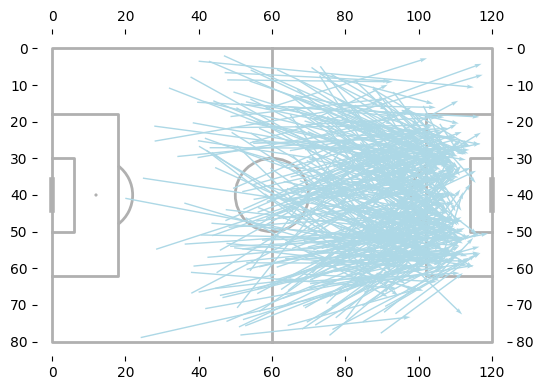

In [ ]:
import math
PI = math.pi

def calculate_degree(radiant):
    return (radiant * (180/3.14))

df["degree"] = df["pass_angle"].apply(calculate_degree)

def is_in_attacking_third(location):
    #print("Executing is_in_attacking_third method")
    pitch_width = 120

    x = location[0]
    y = location[1]

    attacking_third_start = 2 * (pitch_width / 3)
    return (attacking_third_start <= x <= pitch_width)  # Stop before penalty area

def is_in_penalty_area(location):
    #print("Executing is_in_penalty_area method")
    pitch_width = 120

    x = location[0]
    y = location[1]

    # Check if in larger penalty area but NOT in goal area
    x_axis = ((102 <= x) and (x <= pitch_width))  # Stop before goal area
    y_axis = ((40 - 22) <= y and y <= (40 + 22))
    return x_axis and y_axis

def is_ball_moving_toward_opponent_goal(angle, tolerance=90):
    """
    Checks if the ball's movement angle (in radians) is within the allowed range of angle towards the goal.
    
    Parameters:
    - angle (float): The angle in radians (from arctan of y/x).
    - tolerance (float): Maximum angle in degrees (default is 70°).
    
    Returns:
    - bool: True if the angle is within the tolerance, False otherwise.
    """
    normalized_angle = angle * (180 / PI)
    return abs(normalized_angle) < tolerance

def is_ball_moving_vertical(angle, max_tolerance=40):
    """
    Checks if the ball's movement is considered to be deep or vertical moving moving along side the x-axis.
    
    Parameters:
    - angle (float): The angle in radians (from arctan of y/x).
    - max_tolerance (float): Maximum angle in degrees .

    Returns:
    - bool: True if the angle is within the specified range, False otherwise.
    """
    normalized_angle = (angle * (180/PI))
    return  max_tolerance >= abs(normalized_angle)

def is_horizontal_pass(angle, min_tolerance=75, max_tolerance=105):
    """
    Checks if the ball's movement is primarily horizontal based on the angle between the pass direction and the x-axis.
    
    Parameters:
    - angle (float): The angle in radians (from arctan of y/x).
    - min_tolerance (float): Minimum angle in degrees (default is 75°).
    - max_tolerance (float): Maximum angle in degrees (default is 105°).

    Returns:
    - bool: True if the angle is within the specified range, False otherwise.
    """
    normalized_angle = (angle * (180/PI))
    return  max_tolerance >= abs(normalized_angle) >= min_tolerance

def is_progressive_pass(angle, tolerance=75):
    """
    Checks if the ball's movement angle (in radians) is a progressive pass and within the allowed range of angle towards the goal.
    
    Parameters:
    - angle (float): The angle in radians (from arctan of y/x).
    - tolerance (float): Maximum angle in degrees (default is 70°).
    
    Returns:
    - bool: True if the angle is within the tolerance, False otherwise.
    """
    normalized_angle = angle * (180 / PI)
    return abs(normalized_angle) < tolerance

def is_backward_pass(angle, tolerance=105):
    """
    Checks if the ball's movement angle (in radians) is a defensive pass and within the allowed range of angle towards the own goal.
    
    Parameters:
    - angle (float): The angle in radians (from arctan of y/x).
    - tolerance (float): Maximum angle in degrees (default is 70°).
    
    Returns:
    - bool: True if the angle is within the tolerance, False otherwise.
    """
    normalized_angle = angle * (180 / PI)
    return abs(normalized_angle) > tolerance


def is_ex_inside_goal_area(location):
    #print("Executing is_in_goal_area method")
    pitch_width = 120
    x = location[0]
    y = location[1]

    x_axis = ((pitch_width - 6 <= x) and (x <= pitch_width))
    y_axis = ((40 - 10) <= y and y <= (40 + 10))
    return x_axis and y_axis


def is_ex_inside_penalty_area(location):
    #print("Executing is_in_penalty_area method")
    pitch_width = 120

    x = location[0]
    y = location[1]

    if is_ex_inside_goal_area(location):
        return False
    else:
        # Check if in larger penalty area but NOT in goal area
        x_axis = ((102 <= x) and (x <= pitch_width))  # Stop before goal area
        y_axis = ((40 - 22) <= y and y <= (40 + 22))
        return x_axis and y_axis

def is_ex_inside_attacking_third(location):
    #print("Executing is_in_attacking_third method")
    pitch_width = 120

    x = location[0]
    y = location[1]

    if is_ex_inside_goal_area(location) or is_ex_inside_penalty_area(location):
        return False
    else:
        attacking_third_start = 2 * (pitch_width / 3)
        return (attacking_third_start <= x <= pitch_width)  # Stop before penalty area


def is_in_edge_of_the_box(location):
    pitch_width = 120

    if isinstance(location, str):
        location = convert_to_list(location)

    x = location[0]
    y = location[1]

    x_axis = ((102 <= x) and (x <= pitch_width))
    y_axis = ((40 - 10) <= y and y <= (40 + 10))
    return x_axis and y_axis

def convert_to_list(input_data):
    try:
        return literal_eval(input_data)
    except (ValueError, SyntaxError):
        print(f"Error: The string {input_data} could not be converted to a list.")
        return None

# GCA, SCA - passes into penalty area (except corners)
"""
passing = df[df["location"].apply(is_ex_inside_attacking_third) & (df["pass_end_location"].apply(is_in_penalty_area))
             & (df["pass_type"] != "Corner")]


# GCA - low horizontal passes into penalty area (except corners)

passing = df.loc[df["pass_angle"].apply(is_horizontal_pass) & (df["location"].apply(is_ex_inside_attacking_third)) 
                 & (df["pass_end_location"].apply(is_in_penalty_area)) & (df["pass_type"] != "Corner")
                 & (df["pass_height"] == "Ground Pass"), :]


# GCA - low vertical passes into penalty area (except corners)


passing = df.loc[(( df["degree"] >= (-50) )  & (df["degree"] <= (50)) & 
              (df["location"].apply(is_ex_inside_attacking_third)) 
              & (df["pass_end_location"].apply(is_in_penalty_area))) & (df["pass_height"] == "Ground Pass"), :]



# GCA - deep (long) low vertical pass from middle third into penalty area   (except corners)
passing = df.loc[(( df["degree"] >= (-50) )  & (df["degree"] <= (50)) & 
              (df["location"].apply(is_in_middle_third)) 
              & (df["pass_end_location"].apply(is_in_penalty_area)) & (df["pass_length"] >= 30))
              & (df["pass_height"] == "Ground Pass"), :]



# GCA - deep (long) low vertical pass from mid third   
passing = df.loc[(( df["degree"] >= (-40) ) & (df["degree"] <= (40)) & 
              (df["location"].apply(is_in_middle_third)) & (df["pass_length"] >= 30))
              & (df["pass_height"] == "Ground Pass"), :]


# GCA - deep (long) low vertical pass from defending third
passing = df.loc[(( df["degree"] >= (-40) ) & (df["degree"] <= (40)) & (df["pass_length"] >= 30))
                 & (df["location"].apply(is_in_defending_third)) 
              & (df["pass_height"] == "Ground Pass"), :]


# GCA - deep (long) low vertical pass
passing = df.loc[(( df["degree"] >= (-40) ) & (df["degree"] <= (40)) & (df["pass_length"] >= 30)) 
                 & (df["pass_height"] == "Ground Pass"), :]


# GCA - flanke/high/chip horizontal passes into penalty area (except corners) 
passing = df.loc[ (df["pass_angle"].apply(is_horizontal_pass))  & (df["location"].apply(is_ex_inside_attacking_third)) 
                 & (df["pass_end_location"].apply(is_in_penalty_area)) & (df["pass_type"] != "Corner")
                 & (df["pass_height"] == "High Pass"), :]


# GCA - high chip vertical passes into penalty area (except corners) # (( df["degree"] >= (-50) )  & (df["degree"] <= (50)))
passing = df.loc[ (df["pass_angle"].apply(is_ball_moving_vertical))  & (df["location"].apply(is_ex_inside_attacking_third)) 
                 & (df["pass_end_location"].apply(is_in_penalty_area)) & (df["pass_type"] != "Corner")
                 & (df["pass_height"] == "High Pass"), :]

# GCA, SCA - flat Backward Pass into danger zone (except corner)
passing = df.loc[(df["location"].apply(is_ex_inside_attacking_third)) & (df["pass_angle"].apply(is_backward_pass)) 
                 & (df["location"].apply(is_in_edge_of_the_box)) & (df["pass_type"] != "Corner") & (df["pass_height"] == "Ground Pass") , :]

# GCA, SCA - general Backward Pass into danger zone (except corner)
passing = df.loc[(df["location"].apply(is_ex_inside_attacking_third)) & (df["pass_angle"].apply(is_backward_pass)) 
                 & (df["location"].apply(is_in_edge_of_the_box)) & (df["pass_type"] != "Corner"), :]

# defensive pass                 
passing = df.loc[(df["pass_angle"].apply(is_backward_pass)) &  ~(df["location"].apply(is_in_attacking_third)) 
& (df["pass_type"] != "Corner"), :]

# low vertical passes into danger zone
passing = df.loc[(df["pass_angle"].apply(is_ball_moving_vertical)) &  (df["pass_end_location"].apply(is_in_edge_of_the_box)) 
& (df["pass_type"] != "Corner")  & (df["pass_height"] == "Ground Pass"), :]


# high chip vertical passes into danger zone
passing = df.loc[(df["pass_angle"].apply(is_ball_moving_vertical)) &  (df["pass_end_location"].apply(is_in_edge_of_the_box)) 
& (df["pass_type"] != "Corner")  & (df["pass_height"] == "High Pass"), :]


# cut_back_into_edge_of_the_box 
passing = df.loc[(df["pass_cut_back"] == True) & (df["pass_end_location"].apply(is_in_edge_of_the_box)), :] # (df["pass_cut_back"] == True) 

# GCA - pass that cuts last line of defence completed
passing = df.loc[ (df["pass_technique"] == "Through Ball") &  df["pass_outcome"].apply(is_pass_completed) , :]

# GCA - deep (long) low vertical pass from middle third into penalty area   (except corners)
passing = df.loc[ (df["pass_technique"] == "Inswinging") , :]

"""
passing = df.loc[ (df["pass_technique"] == "Through Ball") &  df["pass_outcome"].apply(is_pass_completed) , :]


if MATCH:
    start_location = np.vstack([passes for passes in passing["location"]])
    end_location = np.vstack([passes for passes in passing["pass_end_location"]])

else:
    start_location = np.vstack([literal_eval(passes) for passes in passing["location"]])
    end_location = np.vstack([literal_eval(passes) for passes in passing["pass_end_location"]])

# Calculate the change in x and y (vector direction)
dx = end_location[:, 0] - start_location[:, 0]  # difference in x (end_x - start_x)
dy = end_location[:, 1] - start_location[:, 1]  # difference in y (end_y - start_y)

# Draw pitch
pitch = Pitch(label=True, tick=True)
fig, ax = pitch.draw(figsize=(8, 4))

# Plot arrows using ax.quiver (from start_location to end_location)

pitch.arrows(start_location[:, 0], start_location[:, 1], end_location[:, 0], end_location[:, 1]
             ,ax=ax, width=1, zorder=2,color='lightblue')
"""ax.quiver(
    start_location[:, 0], start_location[:, 1],  # starting points (x, y)
    dx, dy,  # vector components (dx, dy)
    color='lightblue', scale_units='xy', angles='xy', scale=1, width=0.003, headlength=5, headwidth=5, zorder=5
)"""

plt.show()

In [14]:
passing = df.loc[ df["pass_cross"] == True , :]
passing

,player,location,under_pressure,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,...,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_switch,pass_technique,pass_through_ball,pass_type,shot_key_pass_id,degree
1059709,Henrikh Mkhitaryan,"[113.8, 59.4]",False,NaN,-1.445089,NaN,Right Foot,True,NaN,NaN,...,Incomplete,NaN,Pierre-Emerick Aubameyang,3712.0,NaN,NaN,NaN,NaN,NaN,-82.839503
107690,Hiroshi Kiyotake,"[100.9, 12.5]",False,NaN,1.270723,NaN,Right Foot,True,NaN,NaN,...,NaN,NaN,Artur Sobiech,11845.0,NaN,NaN,NaN,NaN,NaN,72.843971
1024815,Ivan Perišić,"[118.6, 58.6]",False,NaN,-1.757160,c748cba1-6571-47a0-b46c-2c1daa00c257,Right Foot,True,NaN,NaN,...,NaN,NaN,Max Kruse,8386.0,NaN,NaN,NaN,NaN,NaN,-100.728946
25124,Matthias Ostrzolek,"[91.8, 12.1]",False,NaN,1.123496,NaN,Left Foot,True,NaN,NaN,...,Incomplete,NaN,Pierre-Michel Lasogga,8895.0,NaN,NaN,NaN,NaN,NaN,64.404229
46694,Valentin Stocker,"[110.5, 76.2]",False,NaN,-1.710100,NaN,Right Foot,True,NaN,NaN,...,Out,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,-98.031199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,Marc Stendera,"[108.3, 71.4]",False,NaN,-1.515060,NaN,Right Foot,True,NaN,NaN,...,Incomplete,NaN,Stefan Aigner,21156.0,NaN,NaN,NaN,NaN,NaN,-86.850579
803094,Johan Danon Djourou-Gbadjere,"[105.3, 74.1]",False,NaN,-1.443645,NaN,Right Foot,True,NaN,NaN,...,Incomplete,NaN,Pierre-Michel Lasogga,8895.0,NaN,NaN,NaN,NaN,NaN,-82.756725
799276,Marcel Risse,"[102.1, 64.2]",False,NaN,-1.088611,NaN,Right Foot,True,NaN,NaN,...,Out,NaN,Anthony Modeste,23486.0,NaN,NaN,NaN,NaN,NaN,-62.404446
104727,Marvin Matip,"[86.4, 68.9]",True,NaN,-0.929688,NaN,Right Foot,True,NaN,NaN,...,Pass Offside,NaN,Pascal Groß,3097.0,NaN,Through Ball,True,NaN,NaN,-53.294191


In [59]:
passing.columns

Index(['player', 'location', 'under_pressure', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_shot_assist', 'pass_height',
       'pass_inswinging', 'pass_length', 'pass_outcome', 'pass_outswinging',
       'pass_recipient', 'pass_recipient_id', 'pass_switch', 'pass_technique',
       'pass_through_ball', 'pass_type', 'shot_key_pass_id', 'degree'],
      dtype='object')

In [78]:
passing

,player,location,under_pressure,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,...,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_switch,pass_technique,pass_through_ball,pass_type,shot_key_pass_id,degree
81,Pavel Kadeřábek,"[117.7, 60.6]",NaN,NaN,-1.886412,ba46e9d6-e828-4599-952c-39c1f7d22659,Right Foot,True,NaN,NaN,...,NaN,NaN,Tarik Elyounoussi,26832.0,NaN,NaN,NaN,NaN,NaN,-108.138268
218,Younès Belhanda,"[88.8, 31.7]",NaN,NaN,-0.625721,d9cea903-f92a-40e1-a393-1a849d83f157,Right Foot,NaN,NaN,NaN,...,NaN,NaN,Klaas-Jan Huntelaar,8060.0,NaN,NaN,NaN,NaN,NaN,-35.869331
302,Benedikt Höwedes,"[87.4, 71.3]",NaN,NaN,-0.978655,92ef54cd-5bb9-4b42-9d82-e60aa070e5a8,Right Foot,True,NaN,NaN,...,NaN,NaN,Klaas-Jan Huntelaar,8060.0,NaN,NaN,NaN,NaN,NaN,-56.101225
303,Johannes Geis,"[120.0, 80.0]",NaN,NaN,-1.850475,fd99f442-49ae-4724-87e8-2512e4a5d9c6,Right Foot,NaN,NaN,NaN,...,NaN,True,Joël Andre Job Matip,3502.0,NaN,Outswinging,NaN,Corner,NaN,-106.078173
465,Jean-Eric Maxim Choupo-Moting,"[107.8, 26.5]",NaN,NaN,2.758849,c4d9a52d-7469-472f-a7e1-70d5a0fe2049,Right Foot,NaN,NaN,NaN,...,NaN,NaN,Klaas-Jan Huntelaar,8060.0,NaN,NaN,NaN,NaN,NaN,158.150585
518,Tarik Elyounoussi,"[89.0, 37.5]",NaN,NaN,-0.671272,cb389b59-0d50-4094-9bcb-5ddfab790447,Right Foot,NaN,NaN,NaN,...,NaN,NaN,Kevin Volland,8215.0,NaN,NaN,NaN,NaN,NaN,-38.480546
519,Sebastian Rudy,"[120.0, 0.1]",NaN,NaN,1.716809,4aaf9747-c33d-4f76-bb0f-d25ad1ebe7c6,Right Foot,NaN,NaN,NaN,...,NaN,NaN,Mark Uth,8387.0,NaN,Inswinging,NaN,Corner,NaN,98.415780
595,Kevin Volland,"[94.5, 48.8]",NaN,NaN,-1.689054,3a04baf2-b287-40c9-b614-608b323087c9,Left Foot,NaN,NaN,NaN,...,NaN,NaN,Andrej Kramarić,5460.0,NaN,NaN,NaN,NaN,NaN,-96.824746
660,Younès Belhanda,"[44.9, 43.0]",NaN,NaN,0.434004,d740d3a5-3ebb-4887-8b11-2153ad9e958f,Right Foot,NaN,NaN,NaN,...,NaN,NaN,Leroy Sané,3053.0,NaN,NaN,NaN,NaN,NaN,24.879207
722,Leroy Sané,"[106.9, 62.1]",NaN,NaN,-1.556908,4cd68d3a-7161-4803-9c2c-75771fb67c82,Left Foot,True,NaN,NaN,...,NaN,NaN,Max Meyer,8508.0,NaN,NaN,NaN,NaN,NaN,-89.249526


thoughts:
- horizontal passes in middle third are not progressive or gca
- horizontal passes into final third are progressive and gca
- vertical passes into final third are progressive and gca
- vertical passes into the box are progressicve and gca
- short passes in corner area are not progressive and not gca

# __Archive__

Old slow version

In [ ]:
player_under_pressure_grouping = df.groupby(['player',"under_pressure"]).agg(
    passes_total=('player', "count"),
    passes_completed = ("pass_outcome", lambda x: (x.apply(is_pass_completed)).sum()),
    passes_from_attacking_third=("location", lambda x: x.apply(is_in_attacking_third).sum()),
    passes_from_middle_third=("location", lambda x: x.apply(is_in_middle_third).sum()),
    passes_from_defending_third=("location", lambda x: x.apply(is_in_defending_third).sum()),
    passes_from_the_box=("location", lambda x: x.apply(is_in_penalty_area).sum()),
    passes_into_attacking_third=("pass_end_location", lambda x: x.apply(is_in_attacking_third).sum()),
    passes_into_box=("pass_end_location", lambda x: (x.apply(is_in_penalty_area) & ~df["location"].apply(is_in_penalty_area)).sum()),
    passes_into_box_completed=("pass_end_location", lambda x: (x.apply(is_in_penalty_area) & ~df["location"].apply(is_in_penalty_area) & completed_passes(df)).sum()),
    passes_into_goal_area=("pass_end_location", lambda x: x.apply(is_in_goal_area).sum()),
    passes_into_edge_of_the_box=("pass_end_location", lambda x: x.apply(is_in_edge_of_the_box).sum()),
    passes_within_attacking_third=("location", lambda x: (x.apply(is_in_attacking_third) & df["pass_end_location"].apply(is_in_attacking_third)).sum()),
    passes_within_attacking_third_completed=("location", lambda x: (x.apply(is_in_attacking_third) & df["pass_end_location"].apply(is_in_attacking_third) & completed_passes(df)).sum()),
    passes_total_distance=("pass_length", lambda x: x.sum()),
    passes_short_total=("pass_length", lambda x: ((x >= 5) & (x <= 15)).sum()),
    passes_short_completed=("pass_length", lambda x: (((x >= 5) & (x <= 15)) & completed_passes(df)).sum()),
    passes_medium_completed=("pass_length", lambda x: ((x >= 15) & (x <= 30) & completed_passes(df)).sum()),
    passes_medium_total=("pass_length", lambda x: ((x >= 15) & (x <= 30)).sum()),
    passes_long_total=("pass_length", lambda x: (x >= 30).sum()),
    passes_long_completed=("pass_length", lambda x: ((x >= 30) & completed_passes(df)).sum()),
    passes_shot_assist=("pass_shot_assist", lambda x: (x == True).sum()),
    passes_goal_assist=("pass_goal_assist", lambda x: (x == True).sum()),
    passes_switch=("pass_switch", lambda x: (x == True).sum()),
    passes_cross=("pass_cross", lambda x: (x == True).sum()),
    passes_cut_back=("pass_cut_back", lambda x: (x == True).sum()),
    passes_vertical_into_edge_of_the_box=("pass_angle", lambda x: ((x.apply(is_vertical_pass)) 
                                                                         &  (df["pass_end_location"].apply(is_in_edge_of_the_box)) & (df["pass_type"] != "Corner")
                                                                         & ~df["location"].apply(is_in_edge_of_the_box)).sum()),
    passes_vertical_into_the_box=("pass_angle", lambda x: ((x.apply(is_vertical_pass)) 
                                                                &  (df["pass_end_location"].apply(is_in_penalty_area)) & (df["pass_type"] != "Corner")
                                                                & ~df["location"].apply(is_in_penalty_area)).sum()),
    passes_horizontal_into_the_box=("pass_angle", lambda x: ( (x.apply(is_horizontal_pass)) 
                                                                &  (df["pass_end_location"].apply(is_in_penalty_area)) & (df["pass_type"] != "Corner")
                                                                & ~df["location"].apply(is_in_penalty_area)).sum()),
    passes_horizontal_into_edge_of_the_box=("pass_angle", lambda x: ((x.apply(is_horizontal_pass)) 
                                                                &  (df["pass_end_location"].apply(is_in_edge_of_the_box)) & (df["pass_type"] != "Corner")
                                                                & ~df["location"].apply(is_in_edge_of_the_box)).sum()),                                                            
    passes_cut_back_into_edge_of_the_box=("pass_cut_back", lambda x: ((x == True) & is_cut_back_into_edge_of_the_box(df)).sum()),
    passes_high_vertical_into_edge_of_the_box=("pass_height", lambda x: ((x == "High Pass") & (df["pass_angle"].apply(is_vertical_pass)) 
                                                                         &  (df["pass_end_location"].apply(is_in_edge_of_the_box)) & (df["pass_type"] != "Corner")
                                                                         & ~df["location"].apply(is_in_edge_of_the_box)).sum()),
    passes_high_vertical_into_the_box=("pass_height", lambda x: ((x == "High Pass") & (df["pass_angle"].apply(is_vertical_pass)) 
                                                                        &  (df["pass_end_location"].apply(is_in_penalty_area)) & (df["pass_type"] != "Corner")
                                                                        & ~df["location"].apply(is_in_penalty_area)).sum()),
    passes_low_vertical_into_edge_of_the_box=("pass_height", lambda x: ((x == "Ground Pass") & (df["pass_angle"].apply(is_vertical_pass)) 
                                                                &  (df["pass_end_location"].apply(is_in_edge_of_the_box)) & (df["pass_type"] != "Corner")
                                                                & ~df["location"].apply(is_in_edge_of_the_box)).sum()),                                                                     
    passes_low_vertical_into_the_box=("pass_height", lambda x: ((x == "Ground Pass") & (df["pass_angle"].apply(is_vertical_pass)) 
                                                                &  (df["pass_end_location"].apply(is_in_penalty_area)) & (df["pass_type"] != "Corner")
                                                                & ~df["location"].apply(is_in_penalty_area)).sum()),
    passes_high_horizontal_into_the_box=("pass_height", lambda x: ((x == "High Pass") & (df["pass_angle"].apply(is_horizontal_pass)) 
                                                                &  (df["pass_end_location"].apply(is_in_penalty_area)) & (df["pass_type"] != "Corner")
                                                                & ~df["location"].apply(is_in_penalty_area)).sum()),
    passes_high_horizontal_into_edge_of_the_box=("pass_height", lambda x: ((x == "High Pass") & (df["pass_angle"].apply(is_horizontal_pass)) 
                                                                &  (df["pass_end_location"].apply(is_in_edge_of_the_box)) & (df["pass_type"] != "Corner")
                                                                & ~df["location"].apply(is_in_edge_of_the_box)).sum()),
    passes_low_horizontal_into_the_box=("pass_height", lambda x: ((x == "Ground Pass") & (df["pass_angle"].apply(is_horizontal_pass)) 
                                                                &  (df["pass_end_location"].apply(is_in_penalty_area)) & (df["pass_type"] != "Corner")
                                                                & ~df["location"].apply(is_in_penalty_area)).sum()),
    passes_low_horizontal_into_edge_of_the_box=("pass_height", lambda x: ((x == "Ground Pass") & (df["pass_angle"].apply(is_horizontal_pass)) 
                                                                &  (df["pass_end_location"].apply(is_in_edge_of_the_box)) & (df["pass_type"] != "Corner")
                                                                & ~df["location"].apply(is_in_edge_of_the_box)).sum()),
    passes_defensive=("pass_angle", lambda x: ((x.apply(is_backward_pass)) & ~(df["location"].apply(is_in_attacking_third)) 
                                            & (df["pass_type"] != "Corner")).sum()),
    passes_progressive=("pass_angle", lambda x: x.apply(is_progressive_pass).sum()),                                                                                                                                        
    passes_progressive_completed=("pass_angle", lambda x: (x.apply(is_progressive_pass) & completed_passes(df)).sum()),                                                                                                                                        
    passes_horizontal=("pass_angle", lambda x: x.apply(is_horizontal_pass).sum()),
    passes_backward=("pass_angle", lambda x: x.apply(is_backward_pass).sum()),
    passes_backward_completed=("pass_angle", lambda x: (x.apply(is_backward_pass) & completed_passes(df)).sum()),                                                                                                                                        
    passes_long_vertical=("pass_angle", lambda x: (x.apply(is_vertical_pass) & (df["pass_length"] >= 30)).sum()),
    passes_long_vertical_from_defending_third=("pass_angle", lambda x: ( x.apply(is_vertical_pass) & (df["pass_length"] >= 30) & (df["location"].apply(is_in_defending_third)) ).sum()),
    passes_long_vertical_from_mid_third=("pass_angle", lambda x: (x.apply(is_vertical_pass) & (df["pass_length"] >= 30) & (df["location"].apply(is_in_middle_third)) ).sum()),
    passes_long_vertical_from_mid_third_into_the_box=("pass_angle", lambda x: (x.apply(is_vertical_pass) & (df["pass_length"] >= 30) 
                                                                           & (df["location"].apply(is_in_middle_third)) & (df["pass_end_location"].apply(is_in_penalty_area)) 
                                                                           & (df["pass_type"] != "Corner")).sum()),                                                                      
    
)
player_under_pressure_grouping["key_passes"] = player_under_pressure_grouping['passes_shot_assist'] + player_under_pressure_grouping['passes_goal_assist']
player_under_pressure_grouping

In [102]:
total_stats = player_under_pressure_grouping.groupby('player').sum()
player_under_pressure_grouping = player_under_pressure_grouping.add_prefix('up_')
player_under_pressure_grouping = player_under_pressure_grouping.reset_index()
player_under_pressure_grouping = player_under_pressure_grouping[player_under_pressure_grouping["under_pressure"] == True]
player_under_pressure_grouping = player_under_pressure_grouping.drop("under_pressure", axis=1)

player_stats = pd.merge(left=total_stats, right=player_under_pressure_grouping, on="player")
display(player_stats), print(player_stats.columns)

,player,passes_total,passes_completed,passes_from_attacking_third,passes_from_middle_third,passes_from_defending_third,passes_from_the_box,passes_into_attacking_third,passes_into_box,passes_into_box_completed,...,up_passes_progressive,up_passes_progressive_completed,up_passes_horizontal,up_passes_backward,up_passes_backward_completed,up_passes_long_vertical,up_passes_long_vertical_from_defending_third,up_passes_long_vertical_from_mid_third,up_passes_long_vertical_from_mid_third_into_the_box,up_key_passes
0,Alessandro Schöpf,13,10,7,2,4,1,5,0,0,...,3,1,0,0,0,0,0,0,0,0
1,Andrej Kramarić,36,25,17,16,3,4,18,4,2,...,4,1,3,4,3,0,0,0,0,0
2,Benedikt Höwedes,54,49,6,31,17,0,10,2,1,...,3,2,0,1,1,1,1,0,0,0
3,Ermin Bičakčić,52,47,1,21,30,0,2,1,0,...,5,2,0,0,0,1,1,0,0,0
4,Eugen Polanski,18,18,4,11,3,0,6,0,0,...,3,3,0,1,1,0,0,0,0,0
5,Fabian Lukas Schär,72,64,1,43,28,0,11,1,1,...,13,12,1,2,2,1,0,1,0,0
6,Jean-Eric Maxim Choupo-Moting,34,28,10,23,1,2,14,0,0,...,5,4,1,3,3,0,0,0,0,0
7,Johannes Geis,86,77,5,48,33,0,15,5,1,...,7,5,2,3,3,1,0,0,0,0
8,Joël Andre Job Matip,78,74,0,19,59,0,1,0,0,...,1,1,2,1,1,0,0,0,0,0
9,Kevin Kuranyi,7,5,3,4,0,1,4,0,0,...,0,0,1,0,0,0,0,0,0,0


Index(['player', 'passes_total', 'passes_completed',
       'passes_from_attacking_third', 'passes_from_middle_third',
       'passes_from_defending_third', 'passes_from_the_box',
       'passes_into_attacking_third', 'passes_into_box',
       'passes_into_box_completed', 'passes_into_goal_area',
       'passes_into_edge_of_the_box', 'passes_within_attacking_third',
       'passes_within_attacking_third_completed', 'passes_total_distance',
       'passes_short_total', 'passes_short_completed',
       'passes_medium_completed', 'passes_medium_total', 'passes_long_total',
       'passes_long_completed', 'passes_shot_assist', 'passes_goal_assist',
       'passes_switch', 'passes_cross', 'passes_cut_back',
       'passes_vertical_into_edge_of_the_box', 'passes_vertical_into_the_box',
       'passes_horizontal_into_the_box',
       'passes_horizontal_into_edge_of_the_box',
       'passes_cut_back_into_edge_of_the_box',
       'passes_high_vertical_into_edge_of_the_box',
       'passes_high_

(None, None)